# Designing the Simulation:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
def generate_random_coordinates(x_lim, y_lim, num_points):
    """
    Generates random coordinates within specified limits.

    Parameters:
    - x_lim (tuple): A tuple containing the lower and upper bounds for the x-coordinate.
    - y_lim (tuple): A tuple containing the lower and upper bounds for the y-coordinate.
    - num_points (int): The number of random coordinates to generate.

    Returns:
    - list: A list of randomly generated coordinates as (x, y) tuples.

    Example:
    To generate 10 random coordinates between x=[0, 1] and y=[-1, 1], you can call the function like this:
    generate_random_coordinates((0, 1), (-1, 1), 10)
    """
    
    coordinates = []

    for _ in range(num_points):
        x = random.uniform(x_lim[0], x_lim[1])
        y = random.uniform(y_lim[0], y_lim[1])
        coordinates.append((x, y))

    return coordinates

In [3]:
def monte_carlo_estimation_of_pi(coordinates, show_visual=True, print_report=True):
    """
    Estimate the value of π using the Monte Carlo method and the quarter-circle technique.

    Parameters:
        coordinates (list of tuples): A list of (x, y) coordinate tuples.
        show_visual (bool, optional): Whether to show a visual representation of the estimation.
                                      Defaults to True.

    Returns:
        float: The estimated value of π.

    The function uses random coordinates to simulate points within a square and estimates π based on the ratio
    of points that fall inside a quarter circle to the total number of points. This technique leverages
    the geometry of a quarter circle inscribed within a square to estimate the value of π.

    If show_visual is True, it also displays a visual representation of the square, quarter circle,
    and the points on a plot.
    """

    points_within_quarter_circle = 0
    points_outside_quarter_circle_but_within_square = 0
    total_points = len(coordinates)

    if show_visual == True:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.set_xticks([-1, 0, 1])
        ax.set_yticks([-1, 0, 1])
        ax.set_aspect('equal')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        # Plot the circle
        radius = 1
        center = (0, 0)
        theta = np.linspace(0, 2 * np.pi, 100)
        x = center[0] + radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
        ax.plot(x, y, color='black', linewidth=0.6)

        # Plot the square
        square_x = [0, 1, 1, 0, 0]
        square_y = [0, 0, 1, 1, 0]
        ax.plot(square_x, square_y, label='Square', color='black', linewidth=0.6)

        # Plot the points based on their location
        for point in coordinates:
            x, y = point
            distance = np.sqrt(x**2 + y**2)

            if distance <= radius:
                ax.scatter(x, y, color='#496DE4', s=3)  # Inside the circle
                points_within_quarter_circle += 1
            elif 0 <= x <= 1 and 0 <= y <= 1:
                ax.scatter(x, y, color='#F36565', s=3)  # Inside the square but outside the circle
                points_outside_quarter_circle_but_within_square += 1

        estimated_pi = 4 * (points_within_quarter_circle / total_points)

        ax.set_title(f'Monte Carlo Estimation of π: {estimated_pi}')

        plt.show()
    
    else:
        radius = 1

        for point in coordinates:
            x, y = point
            distance = np.sqrt(x**2 + y**2)

            if distance <= radius:
                points_within_quarter_circle += 1 # Inside the circle
            elif 0 <= x <= 1 and 0 <= y <= 1: 
                points_outside_quarter_circle_but_within_square += 1 # Inside the square but outside the circle
    
        estimated_pi = 4 * (points_within_quarter_circle / total_points)

    if print_report == True:
        print(f'Points falling within quarter circle: {points_within_quarter_circle}')
        print(f'Points falling outside quarter circle, but within square: {points_outside_quarter_circle_but_within_square}')
        print(f'Estimated value of π for {total_points} total points: {estimated_pi}\n')

    return estimated_pi


# Performing the Simulation:

## Non-Sequential Simulation

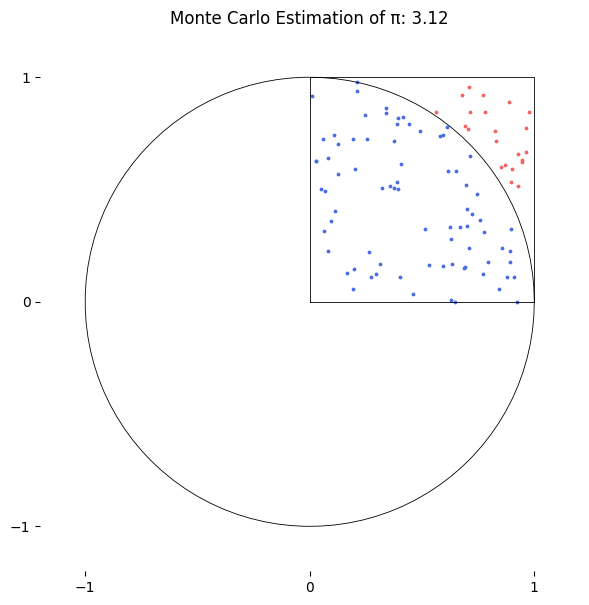

Points falling within quarter circle: 78
Points falling outside quarter circle, but within square: 22
Estimated value of π for 100 total points: 3.12



3.12

In [39]:
N = 100

random_coords = generate_random_coordinates(
    x_lim = (0,1), 
    y_lim = (0,1), 
    num_points = N
)

monte_carlo_estimation_of_pi(
    coordinates = random_coords, 
    show_visual=True,
    print_report=True
)

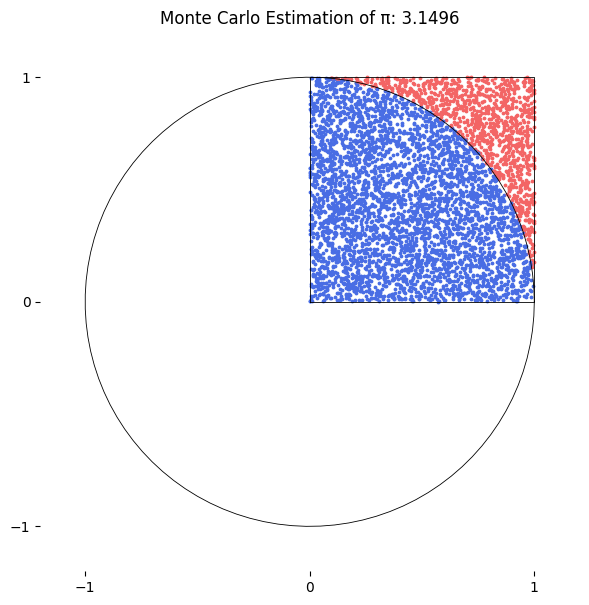

Points falling within quarter circle: 3937
Points falling outside quarter circle, but within square: 1063
Estimated value of π for 5000 total points: 3.1496


In [44]:
N = 5000

random_coords = generate_random_coordinates(
    x_lim = (0,1), 
    y_lim = (0,1), 
    num_points = N
)

monte_carlo_estimation_of_pi(
    coordinates = random_coords, 
    show_visual=True,
    print_report=True
)

## Sequential Simulation

In [36]:
sample_sizes_list = [10, 50, 100, 500, 1000, 5000, 50_000, 100_000, 500_000, 750_000, 1_000_000]
pi_value_estimation = []

for sample_size in sample_sizes_list:
    random_coords = generate_random_coordinates(
        x_lim = (0,1), 
        y_lim = (0,1), 
        num_points = sample_size
    )
    pi_estimate = monte_carlo_estimation_of_pi(
                    coordinates = random_coords, 
                    show_visual=False,
                    print_report=True
    )
    pi_value_estimation.append(pi_estimate)

pi_value_estimation

Points falling within quarter circle: 8
Points falling outside quarter circle, but within square: 2
Estimated value of π for 10 total points: 3.2

Points falling within quarter circle: 39
Points falling outside quarter circle, but within square: 11
Estimated value of π for 50 total points: 3.12

Points falling within quarter circle: 81
Points falling outside quarter circle, but within square: 19
Estimated value of π for 100 total points: 3.24

Points falling within quarter circle: 390
Points falling outside quarter circle, but within square: 110
Estimated value of π for 500 total points: 3.12

Points falling within quarter circle: 790
Points falling outside quarter circle, but within square: 210
Estimated value of π for 1000 total points: 3.16

Points falling within quarter circle: 3915
Points falling outside quarter circle, but within square: 1085
Estimated value of π for 5000 total points: 3.132

Points falling within quarter circle: 39241
Points falling outside quarter circle, but w

[3.2,
 3.12,
 3.24,
 3.12,
 3.16,
 3.132,
 3.13928,
 3.14168,
 3.14352,
 3.141648,
 3.141576]

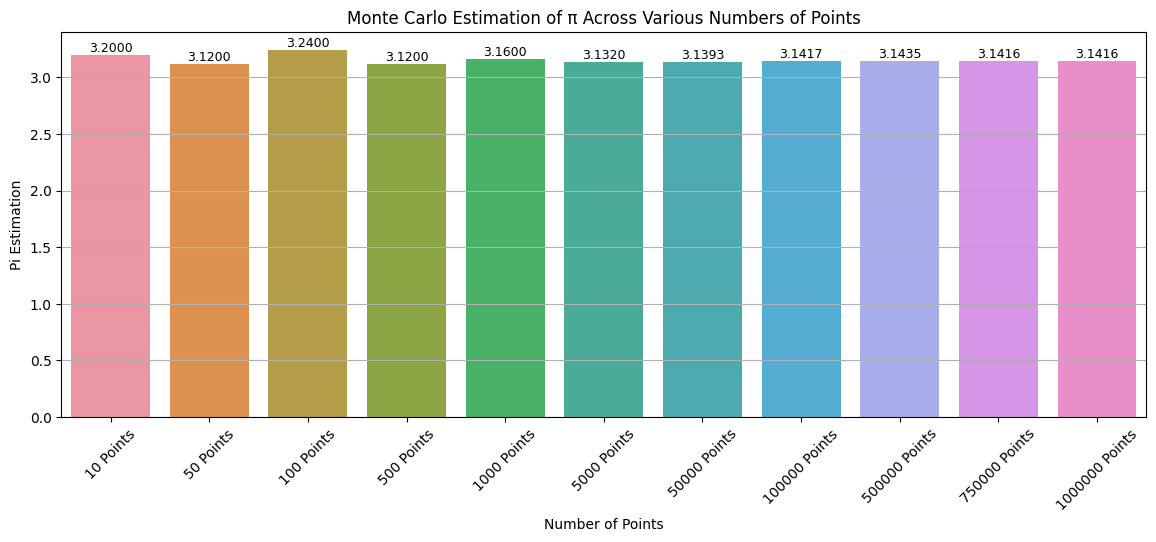

In [37]:
x = sample_sizes_list
y = pi_value_estimation

X_axis = np.arange(len(x))

plt.figure(figsize=(14, 5))
ax = sns.barplot(x=x, y=y)

# Placing bar values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

X_label = [f'{t} Points' for t in x]
plt.xticks(X_axis, X_label, rotation=45)
plt.xlabel('Number of Points')
plt.ylabel('Pi Estimation')
plt.title("Monte Carlo Estimation of π Across Various Numbers of Points")
plt.grid(axis='y')
plt.show()
